In [2]:
import pandas as pd
import tiktoken
import openai
from openai import OpenAI
from scipy.spatial.distance import cosine
import os
client = OpenAI()
openai.api_key = os.environ["OPENAI_API_KEY"]

In [3]:
top_movies_df = pd.read_csv('watcha_top_movies.csv')
top_movies_df.fillna(" ", inplace=True)

In [6]:
top_movies_df

,code,title,year,ratings_avg,nations,genres,plot
0,md76rkk,스파이더맨: 뉴 유니버스,2018,8.376914,['미국'],"['애니메이션', '액션', '모험', '코미디', '가족', 'SF']",평범한 10대 마일스가 우연히 방사능 거미에 물려 스파이더맨 능력을 얻게 된다. 혼...
1,tPrzOrr,시맨틱 에러,2022,8.528728,['한국'],"['로맨스', '드라마', 'BL', 'TV드라마']",컴공과 '아싸' 추상우의 완벽하게 짜인 일상에 에러처럼 나타난 안하무인 디자인과 '...
2,tRW0a6P,언내추럴,2018,8.618332,['일본'],"['드라마', 'TV드라마']",의료 미스 등으로 비정상적이거나 부자연스러운 사인으로 죽음에 이른 시체들의 억울한 ...
3,mLOP7lW,바람,2009,7.886674,['한국'],"['드라마', '액션']",엄한 가정에서 자랐지만 형과 누나와는 다르게 간지나는 학창시절을 보내고 싶었던 짱구...
4,mMO2JAO,메멘토,2000,8.160311,['미국'],"['미스터리', '스릴러']","아내가 살해당한 후, 10분밖에 기억 못하는 단기기억상실증에 걸린 남자가 사진, 메..."
...,...,...,...,...,...,...,...
295,tE6YzVN,백성녀와 흑목사,2023,7.593023,['일본'],"['애니메이션', '로맨틱 코미디', '판타지']","어느 교회, 귀엽지만 엉뚱한 성녀님과 성실하지만 둔감한 목사님이 살고 있다. 성녀 ..."
296,tE15rLM,어른들은 모르는 고딩엄빠 4,2023,5.674419,['한국'],['예능'],10대에 부모가 된 '고딩엄빠'들이 한층 성장해가는 모습을 보여주는 리얼 가족 예능...
297,tE15k20,펜션 메챠,2021,7.552674,['일본'],"['드라마', 'TV드라마']",숲속 펜션을 운영하는 여주인과 펜션을 찾는 사람들의 이야기
298,tRN7gwd,해피메리엔딩,2023,7.634473,['한국'],"['BL', '로맨스', '드라마', 'TV드라마']",방어력 만렙 결혼식 축가자 ‘승준’과 공격력 만렙 결혼식 반주자 ‘재현’이 만나 과...


In [7]:
def combine_movie_info(row):
    title = row['title'].strip()
    content = row['plot'].strip()
    ratings = str(row['ratings_avg'])[:3]
    nations = ", ".join(eval(row['nations'])).strip()
    genres = ", ".join(eval(row['genres'])).strip()
    
    combined = [f"제목: {title}", f"줄거리: {content}", f"평점: {ratings}", f"제작국가: {nations}", f"장르: {genres}"]
    combined = "\n".join(combined)
    
    return f"```{combined}```"

top_movies_df["combined"] = top_movies_df.apply(combine_movie_info, axis=1)
top_movies_df

,code,title,year,ratings_avg,nations,genres,plot,combined
0,md76rkk,스파이더맨: 뉴 유니버스,2018,8.376914,['미국'],"['애니메이션', '액션', '모험', '코미디', '가족', 'SF']",평범한 10대 마일스가 우연히 방사능 거미에 물려 스파이더맨 능력을 얻게 된다. 혼...,```제목: 스파이더맨: 뉴 유니버스\n줄거리: 평범한 10대 마일스가 우연히 방사...
1,tPrzOrr,시맨틱 에러,2022,8.528728,['한국'],"['로맨스', '드라마', 'BL', 'TV드라마']",컴공과 '아싸' 추상우의 완벽하게 짜인 일상에 에러처럼 나타난 안하무인 디자인과 '...,```제목: 시맨틱 에러\n줄거리: 컴공과 '아싸' 추상우의 완벽하게 짜인 일상에 ...
2,tRW0a6P,언내추럴,2018,8.618332,['일본'],"['드라마', 'TV드라마']",의료 미스 등으로 비정상적이거나 부자연스러운 사인으로 죽음에 이른 시체들의 억울한 ...,```제목: 언내추럴\n줄거리: 의료 미스 등으로 비정상적이거나 부자연스러운 사인으...
3,mLOP7lW,바람,2009,7.886674,['한국'],"['드라마', '액션']",엄한 가정에서 자랐지만 형과 누나와는 다르게 간지나는 학창시절을 보내고 싶었던 짱구...,```제목: 바람\n줄거리: 엄한 가정에서 자랐지만 형과 누나와는 다르게 간지나는 ...
4,mMO2JAO,메멘토,2000,8.160311,['미국'],"['미스터리', '스릴러']","아내가 살해당한 후, 10분밖에 기억 못하는 단기기억상실증에 걸린 남자가 사진, 메...","```제목: 메멘토\n줄거리: 아내가 살해당한 후, 10분밖에 기억 못하는 단기기억..."
...,...,...,...,...,...,...,...,...
295,tE6YzVN,백성녀와 흑목사,2023,7.593023,['일본'],"['애니메이션', '로맨틱 코미디', '판타지']","어느 교회, 귀엽지만 엉뚱한 성녀님과 성실하지만 둔감한 목사님이 살고 있다. 성녀 ...","```제목: 백성녀와 흑목사\n줄거리: 어느 교회, 귀엽지만 엉뚱한 성녀님과 성실하..."
296,tE15rLM,어른들은 모르는 고딩엄빠 4,2023,5.674419,['한국'],['예능'],10대에 부모가 된 '고딩엄빠'들이 한층 성장해가는 모습을 보여주는 리얼 가족 예능...,```제목: 어른들은 모르는 고딩엄빠 4\n줄거리: 10대에 부모가 된 '고딩엄빠'...
297,tE15k20,펜션 메챠,2021,7.552674,['일본'],"['드라마', 'TV드라마']",숲속 펜션을 운영하는 여주인과 펜션을 찾는 사람들의 이야기,```제목: 펜션 메챠\n줄거리: 숲속 펜션을 운영하는 여주인과 펜션을 찾는 사람들...
298,tRN7gwd,해피메리엔딩,2023,7.634473,['한국'],"['BL', '로맨스', '드라마', 'TV드라마']",방어력 만렙 결혼식 축가자 ‘승준’과 공격력 만렙 결혼식 반주자 ‘재현’이 만나 과...,```제목: 해피메리엔딩\n줄거리: 방어력 만렙 결혼식 축가자 ‘승준’과 공격력 만...


In [12]:
def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

In [13]:
top_movies_df["embedding"] = top_movies_df.combined.apply(get_embedding)

In [14]:
top_movies_df

,code,title,year,ratings_avg,nations,genres,plot,combined,embedding
0,md76rkk,스파이더맨: 뉴 유니버스,2018,8.376914,['미국'],"['애니메이션', '액션', '모험', '코미디', '가족', 'SF']",평범한 10대 마일스가 우연히 방사능 거미에 물려 스파이더맨 능력을 얻게 된다. 혼...,```제목: 스파이더맨: 뉴 유니버스\n줄거리: 평범한 10대 마일스가 우연히 방사...,"[-0.012234073132276535, -0.0454215332865715, 0..."
1,tPrzOrr,시맨틱 에러,2022,8.528728,['한국'],"['로맨스', '드라마', 'BL', 'TV드라마']",컴공과 '아싸' 추상우의 완벽하게 짜인 일상에 에러처럼 나타난 안하무인 디자인과 '...,```제목: 시맨틱 에러\n줄거리: 컴공과 '아싸' 추상우의 완벽하게 짜인 일상에 ...,"[-0.013814423233270645, -0.01952258311212063, ..."
2,tRW0a6P,언내추럴,2018,8.618332,['일본'],"['드라마', 'TV드라마']",의료 미스 등으로 비정상적이거나 부자연스러운 사인으로 죽음에 이른 시체들의 억울한 ...,```제목: 언내추럴\n줄거리: 의료 미스 등으로 비정상적이거나 부자연스러운 사인으...,"[-0.005696523003280163, -0.018810531124472618,..."
3,mLOP7lW,바람,2009,7.886674,['한국'],"['드라마', '액션']",엄한 가정에서 자랐지만 형과 누나와는 다르게 간지나는 학창시절을 보내고 싶었던 짱구...,```제목: 바람\n줄거리: 엄한 가정에서 자랐지만 형과 누나와는 다르게 간지나는 ...,"[-0.006271901074796915, -0.025329608470201492,..."
4,mMO2JAO,메멘토,2000,8.160311,['미국'],"['미스터리', '스릴러']","아내가 살해당한 후, 10분밖에 기억 못하는 단기기억상실증에 걸린 남자가 사진, 메...","```제목: 메멘토\n줄거리: 아내가 살해당한 후, 10분밖에 기억 못하는 단기기억...","[-0.01387600228190422, -0.02498478628695011, 0..."
...,...,...,...,...,...,...,...,...,...
295,tE6YzVN,백성녀와 흑목사,2023,7.593023,['일본'],"['애니메이션', '로맨틱 코미디', '판타지']","어느 교회, 귀엽지만 엉뚱한 성녀님과 성실하지만 둔감한 목사님이 살고 있다. 성녀 ...","```제목: 백성녀와 흑목사\n줄거리: 어느 교회, 귀엽지만 엉뚱한 성녀님과 성실하...","[0.003930296748876572, -0.024906154721975327, ..."
296,tE15rLM,어른들은 모르는 고딩엄빠 4,2023,5.674419,['한국'],['예능'],10대에 부모가 된 '고딩엄빠'들이 한층 성장해가는 모습을 보여주는 리얼 가족 예능...,```제목: 어른들은 모르는 고딩엄빠 4\n줄거리: 10대에 부모가 된 '고딩엄빠'...,"[0.0018021936994045973, -0.028546486049890518,..."
297,tE15k20,펜션 메챠,2021,7.552674,['일본'],"['드라마', 'TV드라마']",숲속 펜션을 운영하는 여주인과 펜션을 찾는 사람들의 이야기,```제목: 펜션 메챠\n줄거리: 숲속 펜션을 운영하는 여주인과 펜션을 찾는 사람들...,"[-0.011642703786492348, -0.03140822425484657, ..."
298,tRN7gwd,해피메리엔딩,2023,7.634473,['한국'],"['BL', '로맨스', '드라마', 'TV드라마']",방어력 만렙 결혼식 축가자 ‘승준’과 공격력 만렙 결혼식 반주자 ‘재현’이 만나 과...,```제목: 해피메리엔딩\n줄거리: 방어력 만렙 결혼식 축가자 ‘승준’과 공격력 만...,"[-0.01874757558107376, -0.03765924647450447, -..."


In [15]:
tokenizer = tiktoken.get_encoding("cl100k_base")
top_movies_df['n_tokens'] = top_movies_df.combined.apply(lambda x: len(tokenizer.encode(x)))

<AxesSubplot: >

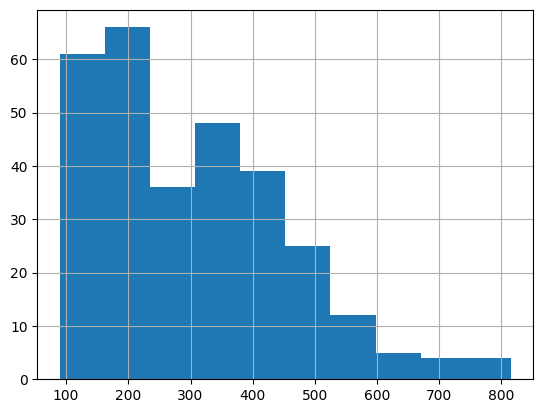

In [17]:
top_movies_df['n_tokens'].hist()

In [18]:
def create_context(
    question, df, max_len=3000
):
    q_embeddings = client.embeddings.create(input=question, model='text-embedding-ada-002').data[0].embedding
    df["distances"] = df["embedding"].apply(lambda x: cosine(q_embeddings, x))
    returns = []
    cur_len = 0
    for i, row in df.sort_values('distances', ascending=True).iterrows():
        cur_len += row['n_tokens'] + 4
        if cur_len > max_len:
            break
        returns.append(row["combined"])
    return "\n\n===\n\n".join(returns)


In [27]:
def answer_question(
    df,
    model="gpt-3.5-turbo",
    question="스파이더맨 줄거리 얘기해줘.",
    max_len=3000,
    debug=False,
):
    context = create_context(
        question,
        df,
        max_len=max_len,
    )
    if debug:
        print("Context:\n" + context)
        print("\n\n")

    try:
        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "system", "content": "Answer the question based on the context below, and if the question can't be answered based on the context, say \"I don't know\"\n\n"},
                {"role": "user", "content": f"context: {context}\n\n---\n\n Question: {question}, 한국어로 대답해줘. 자신감 있게 말해줘"}
            ],
            temperature=0,
        )
        return response.choices[0].message.content
    except Exception as e:
        print("Error occurred:", e)
        return ""

In [22]:
answer_question(top_movies_df, question="펄프픽션 줄거리 얘기해줘.", debug=True)

Context:
```제목: 펄프 픽션
줄거리: 펌킨(팀 로스)과 허니 버니(아만다 플러머)가 레스토랑에서 강도 행각을 벌이기 시작한다. 빈센트(존 트라볼타)와 동료 줄스(사무엘 L 잭슨)는 두목의 금가방을 찾기 위해 다른 건달이 사는 아파트를 찾아간다. 마르셀러스(빙 레임스)는 부치(브루스 윌리스)에게 돈을 주며 상대 선수에게 져 주라고 하지만 부치는 상대 선수를 때려 눕히고 도망치다 어릴 때 아버지에게 물려받은 시계를 찾기 위해 아파트로 향한다. 아무런 상관 없이 보이는 이 사건들이 서로 얽히고 섥히면서 예상치 못한 인과관계가 만들어지는데...
평점: 8.0
제작국가: 미국
장르: 범죄, 드라마```

===

```제목: 펜션 메챠
줄거리: 숲속 펜션을 운영하는 여주인과 펜션을 찾는 사람들의 이야기
평점: 7.5
제작국가: 일본
장르: 드라마, TV드라마```

===

```제목: 스토브리그
줄거리: 팬들의 눈물마저 마른 꼴찌팀에 새로 부임한 단장이 남다른 시즌을 준비하는 뜨거운 겨울 이야기. 

프로야구 경제적 효과 2조원, 프로야구 관중 800만 시대, 역동적인 그라운드, 진한 땀 냄새에 열광하는 프로야구 팬들의 취향 저격하는 이야기. 선수가 아닌 단장을 비롯한 프런트들의 이야기다. 프로 스포츠의 조연인 프런트를 쫓아가는 이 드라마는 사실 그들이 단순 그림자가 아닌 겨울 시즌의 또 다른 주인공임을 보여줄 것이다.
평점: 8.6
제작국가: 한국
장르: 스포츠, 드라마, TV드라마```

===

```제목: 포커 페이스
줄거리: 찰리의 발길이 닿는 곳마다 누군가가 죽는다. 내 갈 길이나 가고 싶지만 용의자의 모든 거짓말이 눈에 보이는 그녀는 쉽게 지나칠 수 없다. 진범이 밝혀지기 전까진.
평점: 8.4
제작국가: 미국
장르: 범죄, 드라마, 미스터리, TV드라마```

===

```제목: 아이 캔 스피크
줄거리: 온 동네를 휘저으며 무려 8천 건에 달하는 민원을 넣어 도깨비 할매라고 불리는 ‘옥분’. 20여 년간 누구도 막을 수 없었던 그녀 앞에 원

'펄프 픽션은 펌킨과 허니 버니가 레스토랑에서 강도 행각을 벌이기 시작하고, 빈센트와 줄스는 두목의 금가방을 찾기 위해 다른 건달이 사는 아파트를 찾아갑니다. 마르셀러스는 부치에게 돈을 주며 상대 선수에게 져 주라고 하지만 부치는 상대 선수를 때려 눕히고 도망치다 어릴 때 아버지에게 물려받은 시계를 찾기 위해 아파트로 향합니다. 이렇게 보이는 이 사건들이 서로 얽히고 섥히면서 예상치 못한 인과관계가 만들어집니다.'

In [24]:
answer_question(top_movies_df, question="가장 높은 평점을 가진 영화가 뭐야? ", debug=True)

Context:
```제목: 최고의 교사: 1년 후, 나는 학생에게 ■당했다
줄거리: 졸업식날 학생 중 누군가에게 밀어 떨어뜨려진 교사가 1년 전 개학일로 시간을 거슬러 올라가 자신을 살해하는 용의자 30명의 학생들과 마주하며 펼쳐지는 이야기를 그린 드라마
평점: 7.4
제작국가: 일본
장르: 미스터리, 스릴러, 드라마, TV드라마```

===

```제목: 폴: 600미터
줄거리: 사상 최초 고공 서바이벌 

지상에서 가장 높은 600m 타워 내려갈 단 하나의 길이 끊겼다! 핸드폰 먹통, 식량 전무, 잠들면 추락.
 
한계 초과! 압도적 스릴!
지금껏 없었던 고소공포에 전율한다!
평점: 6.4
제작국가: 미국
장르: 스릴러```

===

```제목: 원펀맨
줄거리: 히어로 협회에 등록된 최강 히어로들의 싸움을 그린 애니메이션
평점: 8.4
제작국가: 일본
장르: 코미디, 애니메이션, 액션```

===

```제목: 사막의 왕
줄거리: 돈이 전부라고 믿는 사람들과 돈이 다가 아니라 믿는 사람들의 선택에 관한 이야기를 그린 왓챠 오리지널 작품
평점: 6.8
제작국가: 한국
장르: 판타지, 드라마, TV드라마```

===

```제목: 드래프트 킹
줄거리: 최고의 선수를 영입하기 위한 두 스카우트맨의 투지와 활약을 그린 드라마
평점: 7.9
제작국가: 일본
장르: 코미디, 드라마, 스포츠, TV드라마```

===

```제목: 최강 음양사의 이세계 전생기
줄거리: 이세계로 환생한 천재 음양사 주인공이 최강의 음양술과 강력한 요괴들을 거느리고 새로운 삶에 도전하는 판타지 애니메이션
평점: 7.7
제작국가: 일본
장르: 애니메이션, 판타지, 액션, 모험```

===

```제목: 은밀하게 위대하게
줄거리: 북한의 남파특수공작 5446 부대. 20000:1의 경쟁률을 뚫은 최고 엘리트 요원 원류환, 공화국 최고위층 간부의 아들이자 류환 못지 않은 실력자 리해랑, 공화국 사상 최연소 남파간첩 리해진. 세 사람은 5446부대의 전설 같은 존재이다. 하지만 조국통

'가장 높은 평점을 가진 영화는 "문호 스트레이독스 5기"입니다.'

In [25]:
answer_question(top_movies_df, question="미국에서 제작에 참여한 영화 뭐가 있어?", debug=True)

Context:
```제목: 미드소마
줄거리: 90년에 한 번, 9일 동안 열리는 미드소마 축제에 초대된 대니와 친구들. 지지 않는 태양 아래, 불길함으로 가득한 호르가 마을에서 선택된 자만이 즐길 수 있는 공포의 축제가 시작된다.
평점: 6.7
제작국가: 미국, 스웨덴, 헝가리
장르: 드라마, 공포, 미스터리, 스릴러```

===

```제목: 시카리오: 암살자의 도시
줄거리: 하나의 작전, 서로 다른 목표. 당신이 믿었던 정의가 파괴된다. 사상 최악의 마약 조직을 소탕하기 위해 미국 국경 무법지대에 모인 FBI요원 케이트(에밀리 블런트)와 CIA 소속의 작전 총 책임자 맷(조슈 브롤린), 그리고 작전의 컨설턴트로 투입된 정체불명의 남자 알레한드로(베니치오 델 토로). 누구도 믿을 수 없는 극한 상황 속, 세 명의 요원들은 서로 다른 목표를 향해 움직인다. [제20회 부산국제영화제]
평점: 7.7
제작국가: 미국, 멕시코, 홍콩
장르: 액션, 범죄, 드라마, 미스터리, 스릴러```

===

```제목: 미드소마 감독판
줄거리: “이런 축제는 처음이야”
한여름, 낮이 가장 긴 날 열리는 미드소마에 참석하게 된 친구들. 꽃길인 줄 알고 들어간 지옥길, 축제가 끝나기 전까지 절대 빠져나올 수 없다. 큰 상실을 겪은 대니가 남자친구 크리스티안과 스웨덴의 어느 마을에서 한여름 낮이 가장 긴 날 열리는 하지 축제에 참석해 기이한 경험을 겪고 점점 공포에 빠져들게 된다.
평점: 7.2
제작국가: 미국
장르: 드라마, 공포, 미스터리, 스릴러```

===

```제목: 메멘토
줄거리: 아내가 살해당한 후, 10분밖에 기억 못하는 단기기억상실증에 걸린 남자가 사진, 메모, 문신으로 남긴 기록을 따라 범인을 쫓는 기억 추적 스릴러. <인터스텔라><인셉션> 크리스토퍼 놀란 감독의 첫 번째 마스터피스.
평점: 8.1
제작국가: 미국
장르: 미스터리, 스릴러```

===

```제목: 이세계 약국
줄거리: 이세계로 환생한 현대의 약학 연구자가 이세계에서 약국을 개업하여 잘못

'미드소마, 시카리오: 암살자의 도시, 메멘토, 블루밍, 원스 어폰 어 타임 인 아메리카, 마스터'

In [28]:
answer_question(top_movies_df, question="의사가 나오는 영화 뭐 있어? ", debug=True)

Context:
```제목: 【최애의 아이】
줄거리: 산부인과 의사로 일하는 고로 앞에 그가 좋아하는 아이돌 B 코마치의 아이가 나타난다. 그녀에겐 어떤 금단의 비밀이 있었고, 두 사람의 최악의 만남에서 운명이 움직이기 시작한다.
평점: 8.0
제작국가: 일본
장르: 애니메이션, 드라마, 미스터리```

===

```제목: 언내추럴
줄거리: 의료 미스 등으로 비정상적이거나 부자연스러운 사인으로 죽음에 이른 시체들의 억울한 죽음 뒤에 있는 진실을 풀어나가는 사람들의 이야기를 그린 드라마
평점: 8.6
제작국가: 일본
장르: 드라마, TV드라마```

===

```제목: 며느라기 2…ing
줄거리: 혹독한 며느라기를 벗어나기 위해 첫 발을 내딛는 사린, 구영 부부에게 예상치 못한 소식이 찾아온다. 임신이라는 새로운 국면에 접어든 K-임산부 사린의 파란만장한 시월드 이야기가 시작된다.
평점: 8.3
제작국가: 한국
장르: 드라마, TV드라마```

===

```제목: 이세계 약국
줄거리: 이세계로 환생한 현대의 약학 연구자가 이세계에서 약국을 개업하여 잘못된 치료법을 고치고 사람들을 돕고자 분투하는 이야기를 그린 애니메이션
평점: 8.0
제작국가: 일본
장르: 애니메이션, 판타지, 코미디```

===

```제목: 최강 음양사의 이세계 전생기
줄거리: 이세계로 환생한 천재 음양사 주인공이 최강의 음양술과 강력한 요괴들을 거느리고 새로운 삶에 도전하는 판타지 애니메이션
평점: 7.7
제작국가: 일본
장르: 애니메이션, 판타지, 액션, 모험```

===

```제목: 우라미치 선생님
줄거리: 어린이 교육 프로그램에 출연하는 31살 체조 오빠와 주변 인물들의 일상을 그린 애니메이션
평점: 7.4
제작국가: 일본
장르: 애니메이션, 코미디```

===

```제목: 메멘토
줄거리: 아내가 살해당한 후, 10분밖에 기억 못하는 단기기억상실증에 걸린 남자가 사진, 메모, 문신으로 남긴 기록을 따라 범인을 쫓는 기억 추적 스릴러. <인터스텔라><인셉션> 크리스토퍼 놀

'며느라기 2…ing'